In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']])
df_scaled[:10]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966],
       [-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  , -0.61611067],
       [ 1.82781311, -0.184482  , -3.57259724, -1.28821221, -0.69289057,
         0.41977549, -1.02042653, -0.36084741],
       [-0.54791859,  2.38188392

In [5]:
M = np.mean(df_scaled.T, axis=1)
print(M)

C = df_scaled - M
print(C)


[-6.47630098e-17 -9.25185854e-18  1.50342701e-17  1.00613962e-16
 -3.00685403e-17  2.59052039e-16  2.45174251e-16  1.93132547e-16]
[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [8]:
A = C.T
A

array([[ 0.63994726, -0.84488505,  1.23388019, ...,  0.3429808 ,
        -0.84488505, -0.84488505],
       [ 0.84832379, -1.12339636,  1.94372388, ...,  0.00330087,
         0.1597866 , -0.8730192 ],
       [ 0.14964075, -0.16054575, -0.26394125, ...,  0.14964075,
        -0.47073225,  0.04624525],
       ...,
       [ 0.20401277, -0.68442195, -1.10325546, ..., -0.73518964,
        -0.24020459, -0.20212881],
       [ 0.46849198, -0.36506078,  0.60439732, ..., -0.68519336,
        -0.37110101, -0.47378505],
       [ 1.4259954 , -0.19067191, -0.10558415, ..., -0.27575966,
         1.17073215, -0.87137393]])

In [15]:
cov_matrix = np.dot(A, C) / (len(C))
cov_matrix

array([[ 1.        ,  0.12945867,  0.14128198, -0.08167177, -0.07353461,
         0.01768309, -0.03352267,  0.54434123],
       [ 0.12945867,  1.        ,  0.15258959,  0.05732789,  0.33135711,
         0.22107107,  0.1373373 ,  0.26351432],
       [ 0.14128198,  0.15258959,  1.        ,  0.20737054,  0.08893338,
         0.28180529,  0.04126495,  0.23952795],
       [-0.08167177,  0.05732789,  0.20737054,  1.        ,  0.43678257,
         0.3925732 ,  0.18392757, -0.11397026],
       [-0.07353461,  0.33135711,  0.08893338,  0.43678257,  1.        ,
         0.19785906,  0.18507093, -0.04216295],
       [ 0.01768309,  0.22107107,  0.28180529,  0.3925732 ,  0.19785906,
         1.        ,  0.14064695,  0.03624187],
       [-0.03352267,  0.1373373 ,  0.04126495,  0.18392757,  0.18507093,
         0.14064695,  1.        ,  0.03356131],
       [ 0.54434123,  0.26351432,  0.23952795, -0.11397026, -0.04216295,
         0.03624187,  0.03356131,  1.        ]])

In [16]:
values, vectors = np.linalg.eig(cov_matrix)

In [17]:
values

array([2.09437995, 1.73121014, 0.41981618, 0.40446205, 0.68262839,
       0.76234439, 0.87552904, 1.02962987])

In [18]:
vectors

array([[-0.1284321 , -0.59378583, -0.58879003,  0.11784098, -0.19359817,
         0.47560573, -0.08069115,  0.01308692],
       [-0.39308257, -0.17402908, -0.06015291,  0.45035526, -0.09416176,
        -0.46632804,  0.40432871, -0.46792282],
       [-0.36000261, -0.18389207, -0.19211793, -0.01129554,  0.6341159 ,
        -0.32795306, -0.05598649,  0.53549442],
       [-0.43982428,  0.33196534,  0.28221253,  0.5662838 , -0.00958944,
         0.48786206, -0.03797608,  0.2376738 ],
       [-0.43502617,  0.25078106, -0.13200992, -0.54862138,  0.27065061,
         0.34693481,  0.34994376, -0.33670893],
       [-0.45194134,  0.1009598 , -0.03536644, -0.34151764, -0.68537218,
        -0.25320376, -0.05364595,  0.36186463],
       [-0.27061144,  0.122069  , -0.08609107, -0.00825873,  0.08578409,
        -0.11981049, -0.8336801 , -0.43318905],
       [-0.19802707, -0.62058853,  0.71208542, -0.21166198,  0.03335717,
         0.10928996, -0.0712006 , -0.07524755]])

In [19]:
projected_1 = df_scaled.dot(vectors.T[0])
projected_2 = df_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Outcome'] = df['Outcome']
res.head()

,PC1,PC2,Outcome
0,-1.068503,-1.234895,1
1,1.121683,0.733852,0
2,0.396477,-1.595876,1
3,1.115781,1.271241,0
4,-2.359334,2.184819,1


<Figure size 1000x1000 with 0 Axes>

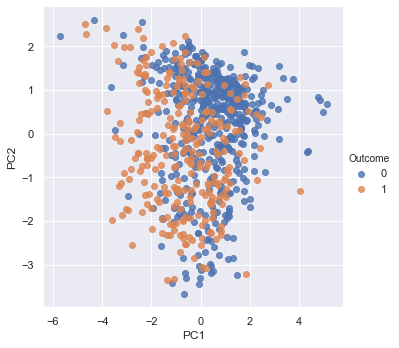

In [20]:
plt.figure(1, figsize=(10,10), dpi=100)
plt.clf()
sns.lmplot(data=res, x="PC1", y="PC2", fit_reg=False, hue='Outcome')
plt.show()